In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

i:0,m_curr: 1.03434,b_curr:0.999084,loss_f:54.42000000000005
i:5,m_curr: 1.0306636861266072,b_curr:0.9990847174836384,loss_f:31.652693443788618
i:10,m_curr: 1.0306629426396074,b_curr:0.9991372974068606,loss_f:31.652687913287213
i:15,m_curr: 1.0306622007339628,b_curr:0.9991898743340621,loss_f:31.65268238342459
i:20,m_curr: 1.0306614588708993,b_curr:0.9992424482437028,loss_f:31.652676854196724
i:25,m_curr: 1.0306607170504136,b_curr:0.9992950191359556,loss_f:31.652671325603524
i:30,m_curr: 1.0306599752725034,b_curr:0.9993475870109939,loss_f:31.652665797644886
i:35,m_curr: 1.0306592335371665,b_curr:0.9994001518689909,loss_f:31.65266027032077
i:40,m_curr: 1.0306584918444,b_curr:0.9994527137101196,loss_f:31.6526547436311
i:45,m_curr: 1.0306577501942016,b_curr:0.9995052725345532,loss_f:31.652649217575828
i:50,m_curr: 1.030657008586569,b_curr:0.9995578283424649,loss_f:31.65264369215483
i:55,m_curr: 1.0306562670214996,b_curr:0.9996103811340278,loss_f:31.652638167368043
i:60,m_curr: 1.0306555254

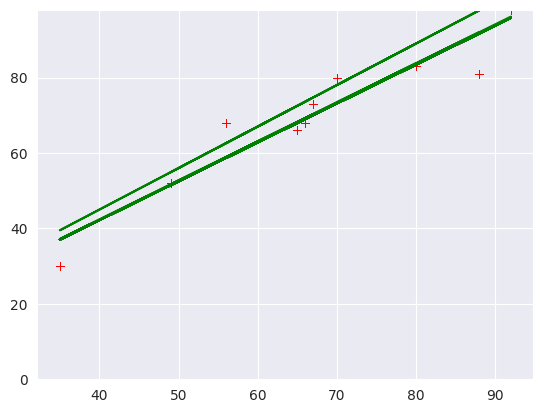

In [90]:
def grad(X, Y):
    n = len(X)
    m_curr = 1.1
    b_curr = 1
    iteration = 100
    learning_rate = 0.0001
    l_list = []
    for i in range(iteration):

        y_pred = m_curr * X + b_curr
        l_f = (1 / n) * (sum((Y - (y_pred)) ** 2))
        l_list.append(l_f)

        d_m = -(2 / n) * sum(X * (Y - (y_pred)))
        d_b = -(2 / n) * sum(Y - (y_pred))
        m_curr = m_curr - (learning_rate * d_m)
        b_curr = b_curr - (learning_rate * d_b)
        sns.scatterplot(x=X, y=Y, marker='+', color="red")
        plt.ylim(0, max(Y))
        plt.plot(X, y_pred, color='green')
        if i % 5 == 0:
            print(f'i:{i},m_curr: {m_curr},b_curr:{b_curr},loss_f:{l_f}')
        if len(l_list) > 1:
            if math.isclose(l_f, l_list[-2], rel_tol=1e-20):
                break
    return m_curr,b_curr

# x = np.array([1, 2, 3, 4, 5])
# y = np.array([5, 7, 9, 11, 13])
# grad(x, y)

# 
df = pd.read_csv("test_scores.csv")
x = np.array(df.math)
y = np.array(df.cs)
# print(type(x),x)
m_cu, b_cu =grad(x, y)
print(f'm_cu:{m_cu}, b_cu:{b_cu}')

l_model = LinearRegression()
reshaped_x= x.reshape(-1,1)
# print(type(reshaped_x),reshaped_x)
l_model.fit(reshaped_x,y)
print(f'model"s coef: {l_model.coef_}')
print(f'model"s intercept: {l_model.intercept_}')
y_pred_sklearn = l_model.predict(reshaped_x)

# Calculate MSE and R-squared for scikit-learn model
mse_sklearn = mean_squared_error(y, y_pred_sklearn)
r2_sklearn = r2_score(y, y_pred_sklearn)

print("Metrics from scikit-learn Linear Regression:")
print(f'MSE: {mse_sklearn}')
print(f'R-squared: {r2_sklearn}')

